# Практическое задание
## KNN и Линейная регрессия
**Задание 1 (30%)**. Сгенерировать случайным образом 3 набора данных. Количество точек в каждом от 100 до 200. Цветом обозначены метки классов. Для каждого набора данных:

• Разделить датасет на train/test(80/20)

• Обучить и протестировать KNN

• Построить графики точности классификации(на train/test выборках) при разных k(1...8)

• Пользуясь стандартными методами из scikit-learn вычислить точность, полноту и F1-меру, построить матрицу расхождений

**Выполнение задания**

In [1]:
import random
import math
import altair as alt
import pandas as pd


def generate_point(min_radius, max_radius, color):
    r = (max_radius - min_radius) * random.random() + min_radius
    theta = random.random() * 2 * math.pi

    x = r * math.cos(theta)
    y = r * math.sin(theta)
    
    return {'x': x, 'y': y, 'color':color}

def generate_ds1():
    points = []
    point_count = random.randint(100, 200)

    for i in range(0, point_count):
        if i < point_count / 2:
            points.append(generate_point(2, 7, 'purple'))
        else:
            points.append(generate_point(7, 15, 'yellow'))
    
    return points

In [2]:
# Генерируем первый набор данных
ds1 = generate_ds1()

In [3]:
# Отображаем первый набор данных
alt.Chart(pd.DataFrame(ds1)).mark_circle(
    opacity=0.6,
    size=70
).encode(
    x='x',
    y='y',
    color=alt.Color('color').scale(None)
)

alt.Chart(...)

In [4]:
# Установить sklearn, если его нет в системе
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [5]:
from sklearn.model_selection import train_test_split

# Разделяем датасет на train/test(80/20)
X_train, X_test, y_train, y_test = train_test_split(
    [[d['x'], d['y']] for d in ds1], 
    [ 0 if d['color'] == 'purple' else 1 for d in ds1], 
    test_size=0.2
)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

def init_knns(X_train, y_train):
    knns = []
    for i in range(1, 9):
        # Создаем классы алгоритмов knn с разным числом соседей
        knns.append(KNeighborsClassifier(n_neighbors=i))
        # Построение моделей на обучающих наборах
        knns[i-1].fit(X_train, y_train)
    return knns

In [7]:
# Создаем классы алгоритмов knn с разным числом соседей и строим модели на обучающих наборах 
knns = init_knns(X_train, y_train)

In [8]:
!pip install mglearn

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np

def draw_decision_boundary(knns, X_train, y_train):
    fig, axes = plt.subplots(2, 4, figsize=(20, 8))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    for n_neighbors, ax in zip(range(1,len(knns)+1), axes.reshape(-1)):
        # создаем объект-классификатор и подгоняем в одной строке
        clf = knns[n_neighbors-1]
        mglearn.plots.plot_2d_separator(clf, X_train, fill=True, eps=0.5, ax=ax, alpha=.4)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("Количество соседей: {}".format(n_neighbors))

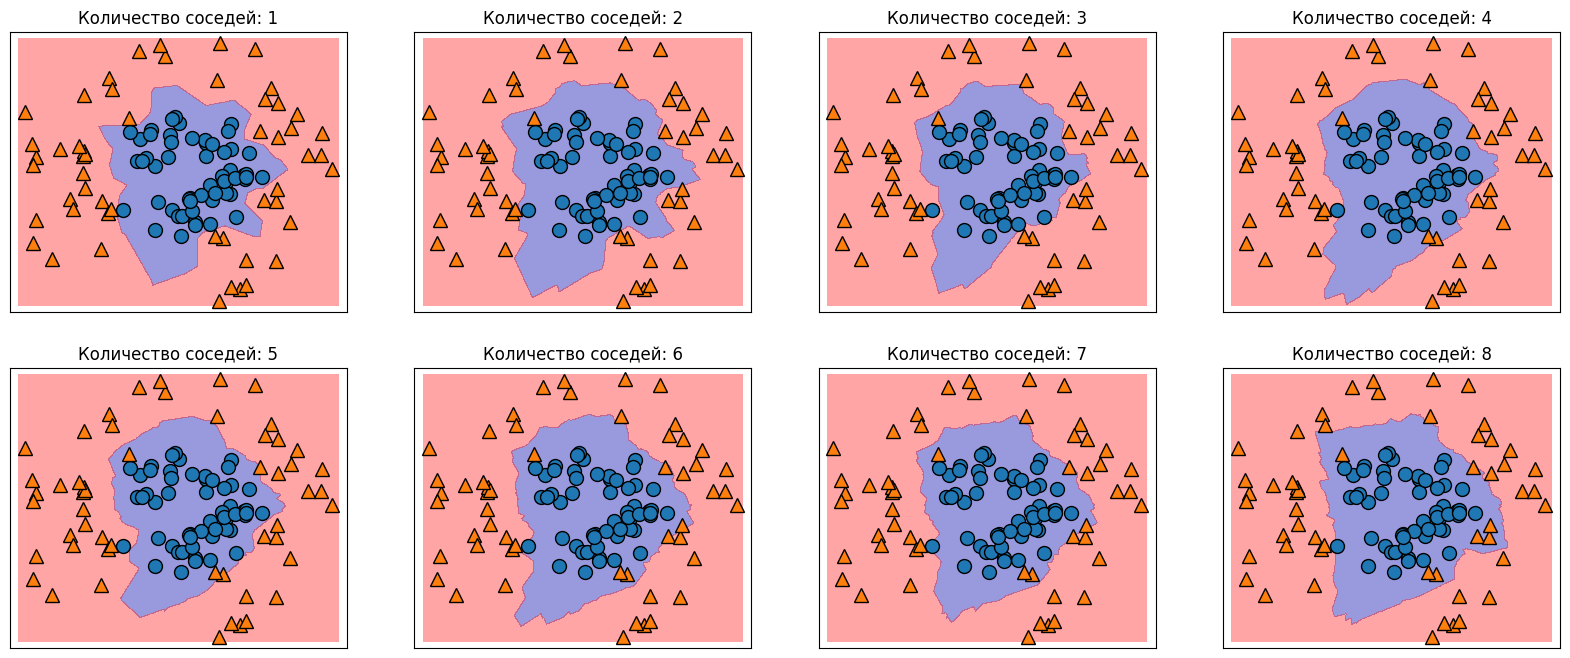

In [10]:
# Рисуем границу принятия решения для каждого n
draw_decision_boundary(knns, X_train, y_train)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def test_knns(knns, X_test, y_test):
    # Тестрование knn
    for i in range(0, len(knns)):
        y_pred = knns[i].predict(X_test)
        print("Прогнозы для тестового набора при k={}:\n{}".format(i, y_pred))
        print("Правильность: {:.2f}".format(knns[i].score(X_test, y_test)))
        # Вычисление точности
        print("Точность: {:.2f}".format(accuracy_score(y_test, y_pred)))
        # Вычисление полноты
        print("Полнота: {}".format(recall_score(y_test, y_pred, average=None)))
        # Вычисление F меры
        print("F-мера: {}".format(f1_score(y_test, y_pred, average=None)))
        # Построение матрицы расхождений
        print("Матрица расхождений:\n{}\n".format(confusion_matrix(y_test, y_pred)))

In [12]:
# Тестируем knn и вычисляем метрики 
test_knns(knns, X_test, y_test)

Прогнозы для тестового набора при k=0:
[0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0]
Правильность: 0.96
Точность: 0.96
Полнота: [1.         0.93333333]
F-мера: [0.96296296 0.96551724]
Матрица расхождений:
[[13  0]
 [ 1 14]]

Прогнозы для тестового набора при k=1:
[0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0]
Правильность: 0.93
Точность: 0.93
Полнота: [1.         0.86666667]
F-мера: [0.92857143 0.92857143]
Матрица расхождений:
[[13  0]
 [ 2 13]]

Прогнозы для тестового набора при k=2:
[0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0]
Правильность: 0.89
Точность: 0.89
Полнота: [0.92307692 0.86666667]
F-мера: [0.88888889 0.89655172]
Матрица расхождений:
[[12  1]
 [ 2 13]]

Прогнозы для тестового набора при k=3:
[0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0]
Правильность: 0.93
Точность: 0.93
Полнота: [1.         0.86666667]
F-мера: [0.92857143 0.92857143]
Матрица расхождений:
[[13  0]
 [ 2 13]]

Прогнозы для тестового набора при k=4:
[0 0 1 0 1 0 

In [13]:
def generate_purple_ds2_point():
    x = 10 - 10 * random.random()
    y = 5 - 5 * random.random() if x <= 5 else 5 + 5 * random.random()
    
    return {'x': x, 'y': y, 'color': 'purple'}

def generate_yellow_ds2_point():
    x = 10 - 10 * random.random()
    y = 5 - 5 * random.random() if x >= 5 else 5 + 5 * random.random()
    
    return {'x': x, 'y': y, 'color': 'yellow'}


def generate_ds2():
    points = []
    point_count = random.randint(100, 200)

    for i in range(0, point_count):
        if i < point_count / 2:
            points.append(generate_purple_ds2_point())
        else:
            points.append(generate_yellow_ds2_point())
    
    return points

In [14]:
# Генерируем второй набор данных
ds2 = generate_ds2()

In [15]:
# Отображаем второй набор данных
alt.Chart(pd.DataFrame(ds2)).mark_circle(
    opacity=0.6,
    size=70
).encode(
    x='x',
    y='y',
    color=alt.Color('color').scale(None)
)

alt.Chart(...)

In [16]:
# Разделяем датасет на train/test(80/20)
X_train, X_test, y_train, y_test = train_test_split(
    [[d['x'], d['y']] for d in ds2], 
    [ 0 if d['color'] == 'purple' else 1 for d in ds2], 
    test_size=0.2
)

In [17]:
# Создаем классы алгоритмов knn с разным числом соседей и строим модели на обучающих наборах 
knns = init_knns(X_train, y_train)

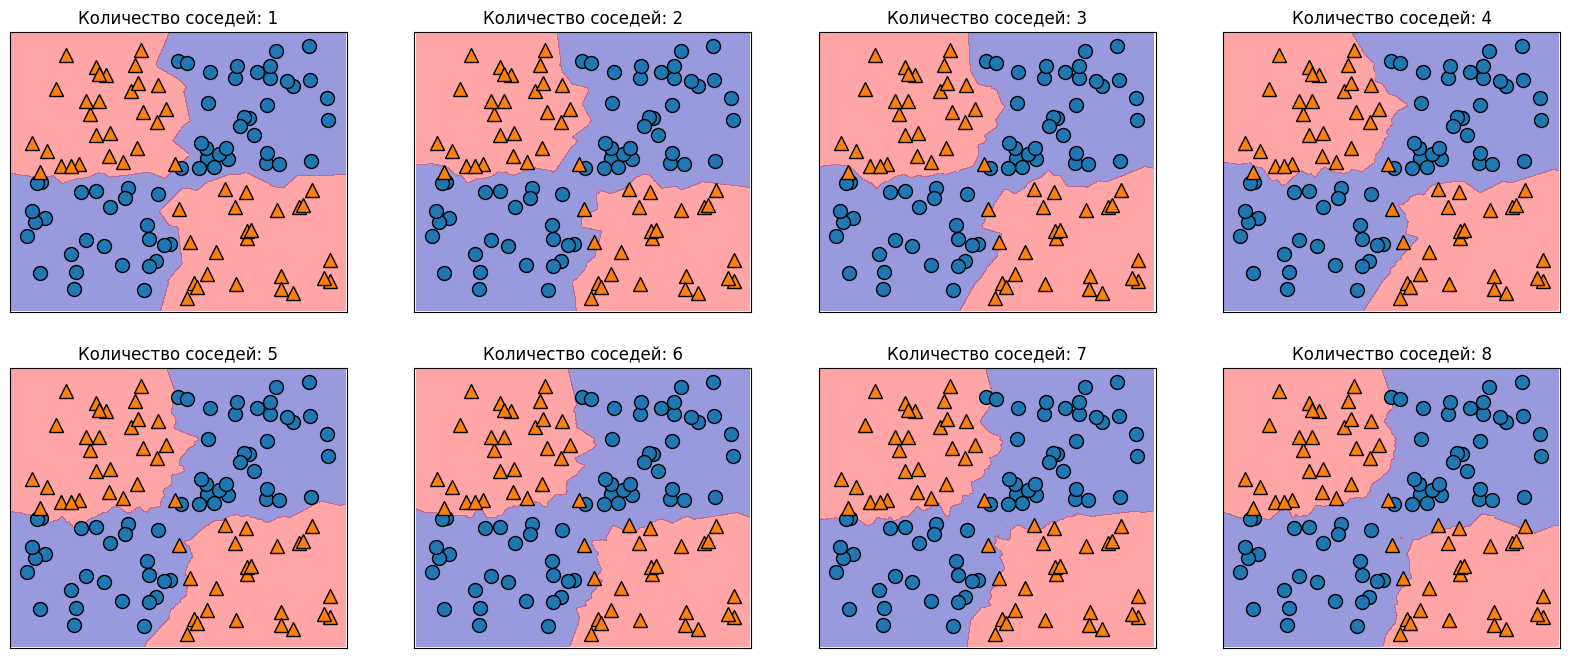

In [18]:
# Рисуем границу принятия решения для каждого n
draw_decision_boundary(knns, X_train, y_train)

In [19]:
# Тестируем knn и вычисляем метрики 
test_knns(knns, X_test, y_test)

Прогнозы для тестового набора при k=0:
[1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1]
Правильность: 1.00
Точность: 1.00
Полнота: [1. 1.]
F-мера: [1. 1.]
Матрица расхождений:
[[11  0]
 [ 0 18]]

Прогнозы для тестового набора при k=1:
[1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1]
Правильность: 0.97
Точность: 0.97
Полнота: [1.         0.94444444]
F-мера: [0.95652174 0.97142857]
Матрица расхождений:
[[11  0]
 [ 1 17]]

Прогнозы для тестового набора при k=2:
[1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1]
Правильность: 1.00
Точность: 1.00
Полнота: [1. 1.]
F-мера: [1. 1.]
Матрица расхождений:
[[11  0]
 [ 0 18]]

Прогнозы для тестового набора при k=3:
[1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1]
Правильность: 1.00
Точность: 1.00
Полнота: [1. 1.]
F-мера: [1. 1.]
Матрица расхождений:
[[11  0]
 [ 0 18]]

Прогнозы для тестового набора при k=4:
[1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1]
Правильность: 1.00
Точность: 1.00
Полнота

In [20]:
def generate_ds3_point(center, tran_x, tran_y, color):
    phi = math.pi*(center+random.random())
    x = math.cos(phi) + tran_x
    y = math.sin(phi) + tran_y
    return {'x': x, 'y': y, 'color': color}


def generate_ds3():
    points = []
    point_count = random.randint(100, 200)

    for i in range(0, point_count):
        if i < point_count / 2:
            points.append(generate_ds3_point(0, 0, 0, 'purple'))
        else:
            points.append(generate_ds3_point(1, 1, 0.5, 'yellow'))
    
    return points

In [21]:
# Генерируем третий набор данных
ds3 = generate_ds3()

In [22]:
# Отображаем третий набор данных
alt.Chart(pd.DataFrame(ds3)).mark_circle(
    opacity=0.6,
    size=70
).encode(
    x='x',
    y='y',
    color=alt.Color('color').scale(None)
)

alt.Chart(...)

In [23]:
# Разделяем датасет на train/test(80/20)
X_train, X_test, y_train, y_test = train_test_split(
    [[d['x'], d['y']] for d in ds3], 
    [ 0 if d['color'] == 'purple' else 1 for d in ds3], 
    test_size=0.2
)

In [24]:
# Создаем классы алгоритмов knn с разным числом соседей и строим модели на обучающих наборах 
knns = init_knns(X_train, y_train)

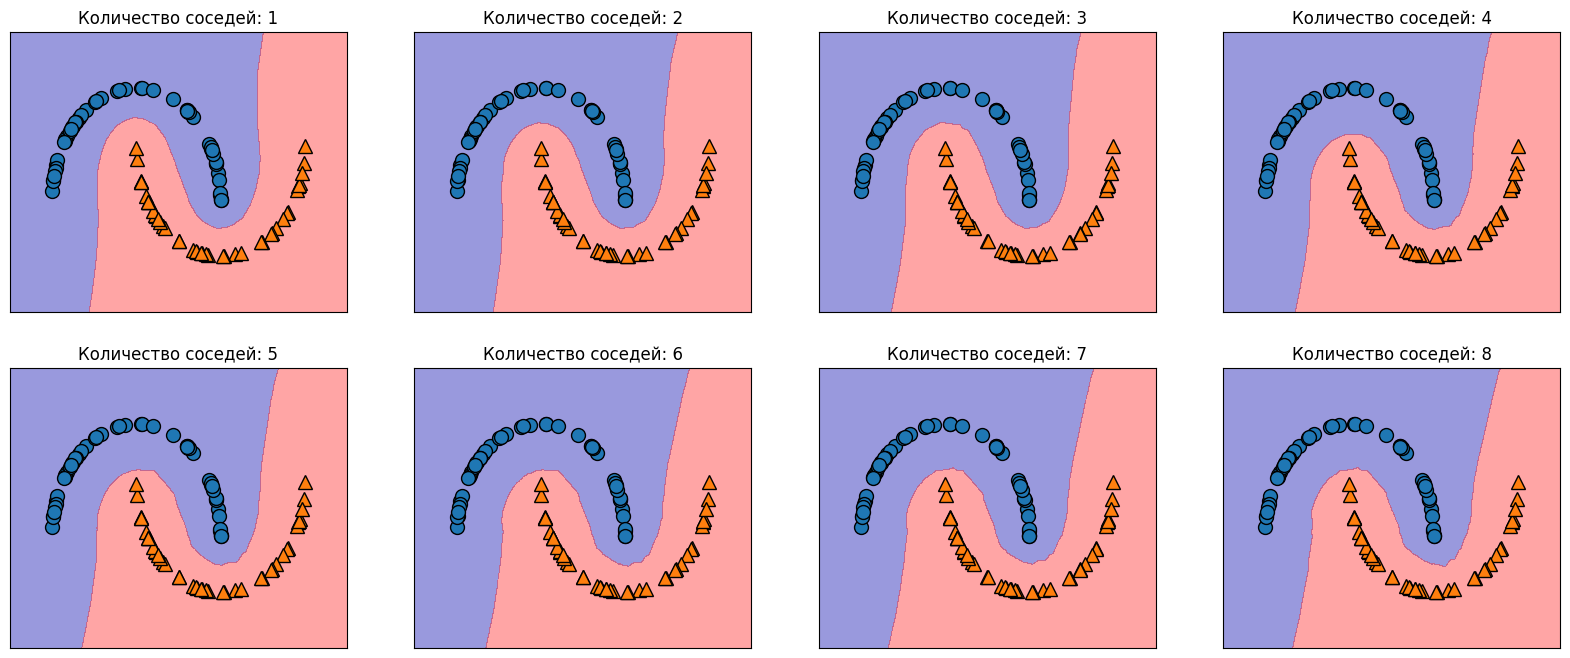

In [25]:
# Рисуем границу принятия решения для каждого n
draw_decision_boundary(knns, X_train, y_train)

In [26]:
# Тестируем knn и вычисляем метрики 
test_knns(knns, X_test, y_test)

Прогнозы для тестового набора при k=0:
[1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1]
Правильность: 1.00
Точность: 1.00
Полнота: [1. 1.]
F-мера: [1. 1.]
Матрица расхождений:
[[ 9  0]
 [ 0 16]]

Прогнозы для тестового набора при k=1:
[1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1]
Правильность: 1.00
Точность: 1.00
Полнота: [1. 1.]
F-мера: [1. 1.]
Матрица расхождений:
[[ 9  0]
 [ 0 16]]

Прогнозы для тестового набора при k=2:
[1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1]
Правильность: 1.00
Точность: 1.00
Полнота: [1. 1.]
F-мера: [1. 1.]
Матрица расхождений:
[[ 9  0]
 [ 0 16]]

Прогнозы для тестового набора при k=3:
[1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1]
Правильность: 1.00
Точность: 1.00
Полнота: [1. 1.]
F-мера: [1. 1.]
Матрица расхождений:
[[ 9  0]
 [ 0 16]]

Прогнозы для тестового набора при k=4:
[1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1]
Правильность: 1.00
Точность: 1.00
Полнота: [1. 1.]
F-мера: [1. 1.]
Матрица расхождений:
[[ 9  0]
 [ 0 16]]

Прогн

**Задание 2 (20%). Метрики.** 

25 объектов классифицированы на 3 класса

```Python
C="Cat"
F="Fish"
H="Hen"
# истинные значения
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# результат системы
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

```
Написать код на python, который воспроизводит вывод, представленный ниже (не используя сторонние библиотеки, кроме numpy):

```cmd
[[4 1 1]
 [6 2 2]
 [3 0 6]]
```

<table>
<tr>
<th></th>
<th>precision</th>
<th>recall</th>
<th>f1-score</th>
<th>support</th>
</tr>

<tr>
<th>Cat</th>
<th>0.308</th>
<th>0.667</th>
<th>0.421</th>
<th>6</th>
</tr>
    
<tr>
<th>Fish</th>
<th>0.667</th>
<th>0.200</th>
<th>0.308</th>
<th>10</th>
</tr>
    
<tr>
<th>Hen</th>
<th>0.667</th>
<th>0.667</th>
<th>0.667</th>
<th>9</th>
</tr>

<tr>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
</tr>
    
<tr>
<th>accuracy</th>
<th></th>
<th></th>
<th>0.480</th>
<th>25</th>
</tr>
    
<tr>
<th>macro avg</th>
<th>0.547</th>
<th>0.511</th>
<th>0.465</th>
<th>25</th>
</tr>
    
<tr>
<th>weighted avg</th>
<th>0.581</th>
<th>0.480</th>
<th>0.464</th>
<th>25</th>
</tr>
</table>

**Выполнение задания** 

In [27]:
import numpy as np

y_true = ['C','C','C','C','C','C', 'F','F','F','F','F','F','F','F','F','F', 'H','H','H','H','H','H','H','H','H']
y_pred = ['C','C','C','C','H','F', 'C','C','C','C','C','C','H','H','F','F', 'C','C','C','H','H','H','H','H','H']
unique = np.unique(y_true)
unique_count = len(unique)
confusion_matrix = np.zeros((unique_count, unique_count))
for i in range(0, len(y_true)):
    pos_true = np.where(unique == y_true[i])
    pos_pred = np.where(unique == y_pred[i])
    confusion_matrix[pos_true, pos_pred] += 1
        
print(np.intc(confusion_matrix))

[[4 1 1]
 [6 2 2]
 [3 0 6]]


In [28]:
res = np.zeros((unique_count+4, unique_count+1))

# Считаем support
res[0:3,3] = np.sum(confusion_matrix, axis=1)

# Считаем precision, recall и f1-score
for i in range(0, 3):
    precision = confusion_matrix[i,i]/np.sum(confusion_matrix[:,i], axis=0)
    recall = confusion_matrix[i,i]/res[i, 3]
    res[i, 0] = precision
    res[i, 1] = recall
    res[i, 2] = 2 * (precision * recall) / (precision + recall)
    
# Cчитаем accuracy
tp = 0 
for i in range(len(y_true)):
    tp += 1 if y_true[i] == y_pred[i] else 0
for i in range(3):
    res[i+4, 3] = len(y_true)
res[4,2] = tp / res[4, 3]

# Считаем macro avg
for i in range(3):
    for j in range(3):
        res[5, j] += res[i, j]
for i in range(3):
    res[5, i] = res[5, i]/unique_count

# Считаем weighted avg
for i in range(3):
    for j in range(3):
        res[6, j] += res[i, j] * (res[i, 3] / res[4, 3])

# Отображаем результаты вычислений
df = pd.DataFrame(
    res, 
    index = ['Cat', 'Fish', 'Hen', '', 'accuracy', 'macro avg', 'weighted avg'], 
    columns = ['precision', 'recall', 'f1-score', 'support']
)
df['support'] = df['support'].astype(int)
df['precision'] = df['precision'].round(decimals=3)
df['recall'] = df['recall'].round(decimals=3)
df['f1-score'] = df['f1-score'].round(decimals=3)
df.loc[''] = ['','','','']
df.loc['accuracy', 'precision'] = ''
df.loc['accuracy', 'recall'] = ''
df

,precision,recall,f1-score,support
Cat,0.308,0.667,0.421,6
Fish,0.667,0.2,0.308,10
Hen,0.667,0.667,0.667,9
,,,,
accuracy,,,0.48,25
macro avg,0.547,0.511,0.465,25
weighted avg,0.581,0.48,0.464,25


**Задание 3 (50%). Линейная регрессия**
<ol>
<li>Самостоятельно выберите набор данных, над которым вы хотите работать. </li>
<li>Загрузите  данные  и  напишите  код,  чтобы  разбить набор на  обучающий и тестовый наборы данных. Выберите как  минимум 3 переменных,  которые вы можете  использовать  для  прогнозирования  значений некоторой  целевой переменной в наборе.</li>
<li>Измерьте точность вашей модели на тренировочном и тестовом наборе данных. Обучите простую (одномерную) линейную  регрессию для  каждой  выбранной переменной. Какая из них дает лучший $R^2$?</li>
</ol>

**Выполнение задания**

In [29]:
import sklearn

# Загрузка датасета
ds = sklearn.datasets.fetch_california_housing()

# Описание дата-сета
print(ds.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [30]:
# Median house value for California districts
y = ds.target

X = []

# MedInc
X.append(ds.data[ :,0])

# HouseAge
X.append(ds.data[ :,1])

# AveRooms
X.append(ds.data[ :,2])

legends = ['MedInc', 'HouseAge', 'AveRooms']

In [32]:
from sklearn.linear_model import LinearRegression

# Линейная регрессия с несколькими параметрами
X_all = np.transpose(X) 

# Разбиение набора на обучающие и тестовые наборы данных
XA_train, XA_test, yA_train, yA_test = train_test_split(X_all, y)

# Построение модели линейной регрессии для нескольких переменных
lrA = LinearRegression().fit(XA_train, yA_train)

print("Точность модели на обучающем наборе: {:.2f}".format(lrA.score(XA_train, yA_train)))
print("Точность модели на тестовом наборе: {:.2f}\n".format(lrA.score(XA_test, yA_test)))

# Коэффициенты линейной регрессии
print("Коэффициенты линейной регрессии y=w[0]*x[0]+w[1]*x[1]+w[2]*x[2]+b:")
print("w: {}".format(lrA.coef_))
print("b: {}".format(lrA.intercept_))

Точность модели на обучающем наборе: 0.51
Точность модели на тестовом наборе: 0.52

Коэффициенты линейной регрессии y=w[0]*x[0]+w[1]*x[1]+w[2]*x[2]+b:
w: [ 0.44815057  0.0165905  -0.03520807]
b: 0.05352989366138283


In [33]:
# Разбиение набора на обучающие и тестовые наборы данных для построения одномерной регрессии по выбранным параметрам
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(len(X)):
    X1_train, X1_test, y1_train, y1_test = train_test_split(X[i], y)
    X_train.append(X1_train)
    y_train.append(y1_train)
    X_test.append(X1_test)
    y_test.append(y1_test)

In [34]:
# Построение моделей
lr = []

for i in range(len(X_train)):
    lr1 = LinearRegression().fit(X_train[i].reshape(-1, 1), y_train[i])
    lr.append(lr1)
    print("Точность модели для переменной {} на обучающем наборе: {:.2f}".format(legends[i], lr[i].score(X_train[i].reshape(-1, 1), y_train[i])))
    print("Точность модели для переменной {} на тестовом наборе: {:.2f}\n".format(legends[i], lr[i].score(X_test[i].reshape(-1, 1), y_test[i])))

# Получение коэффициентов линейной регрессии
coef = []
for i in range(len(lr)):
    # y=ax+b, a=coef_, b=intercept_
    coef.append([lr[i].coef_, lr[i].intercept_])

Точность модели для переменной MedInc на обучающем наборе: 0.47
Точность модели для переменной MedInc на тестовом наборе: 0.49

Точность модели для переменной HouseAge на обучающем наборе: 0.01
Точность модели для переменной HouseAge на тестовом наборе: 0.01

Точность модели для переменной AveRooms на обучающем наборе: 0.02
Точность модели для переменной AveRooms на тестовом наборе: 0.02



y=0.416x+0.461
y=0.010x+1.776
y=0.076x+1.661


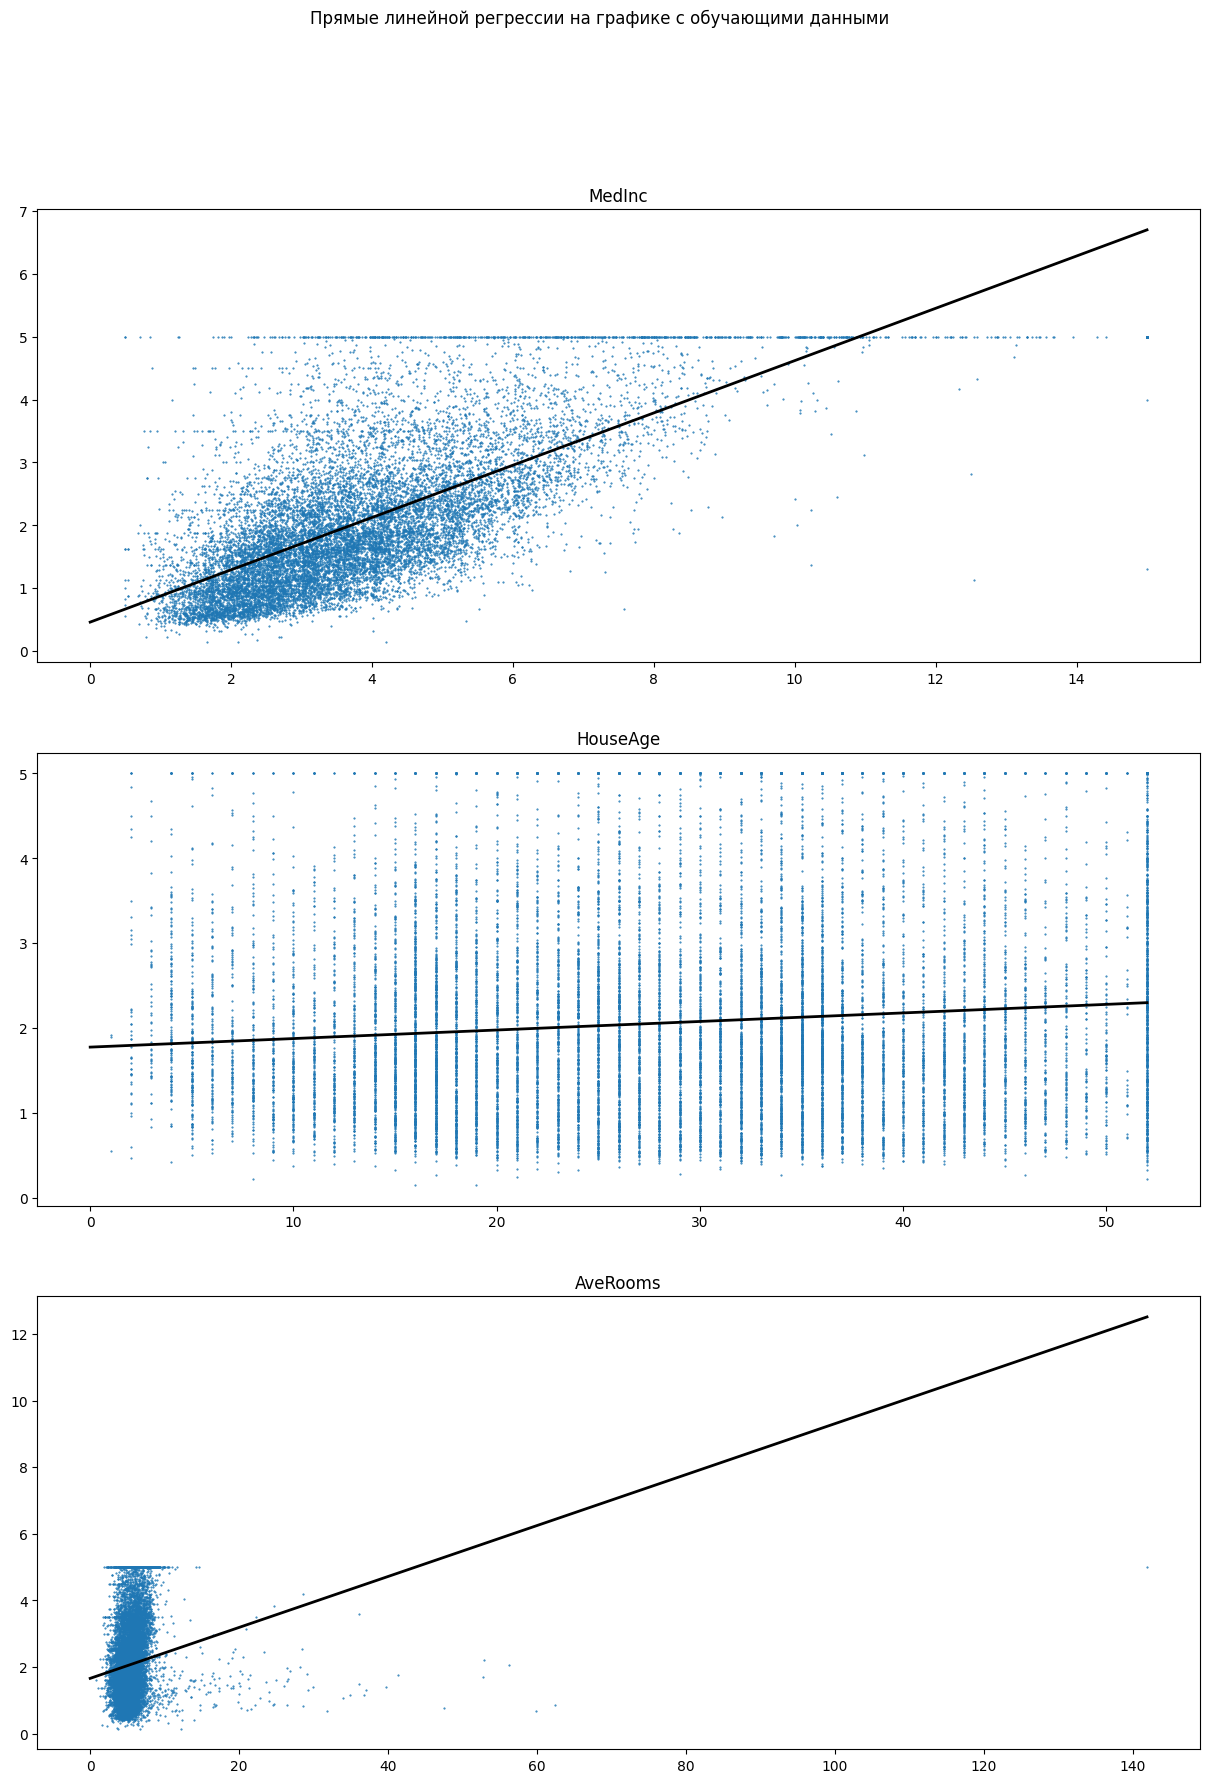

In [35]:
# Отображение прямых линейной регрессии на графике с обучающими данными
fig, axs = plt.subplots(len(lr), figsize=(15, 20))
fig.suptitle('Прямые линейной регрессии на графике с обучающими данными')
for i in range(len(X_train)):
    print("y={:.3f}x+{:.3f}".format(coef[i][0][0], coef[i][1]))
    axs[i].plot(X_train[i], y_train[i], '.', markersize=1)
    axs[i].set_title(legends[i])
    y1 = coef[i][1]
    x2 = np.max(X_train[i])
    y2 = coef[i][0][0]*x2+coef[i][1]
    x = [0, x2]
    y = [y1, y2]
    axs[i].plot(x, y, linewidth=2, color='black')

Наилучшее значение $R^2$ дает переменная MedInc, обозначающая стоимость аренды дома. Но ее значение для тестового набора равное 0.47 недостаточно для достоверного предсказания.